# 500 km images
The main set of images is the random sample of 100 km images. This set includes quite a few cases that are fully cloud covered, and relatively few that are optimal for floe identification. One of the main questions that can't really be resolved with the 100 km images is the question of how large of a cloud-free area is needed in order to get good statistics, for example, for identifying bright sea ice floes. This notebook extends the random sample dataset by selecting cases with visible floes and finding the bounding box for a 500 km image which is still inside the study area. The initial set was made by getting the lowest case number with visible sea ice floes for each location. These images still are not ideal, though -- lots of ambiguous regions and clouds. 

For the second set of images, we want to have examples for tracking. So, we select 1 case from each region with the condition that the floe obscuration is "none". Then, we manually select a time window containing the sampled time with clear skies.




In [1]:
import pandas as pd
df = pd.read_csv('../data/validation_dataset_testtrain_split.csv', index_col=0)
regions = pd.read_csv('../../ice_floe_validation_dataset/data/metadata/region_definitions.csv', index_col=0)

In [6]:
df.columns

Index(['Unnamed: 0', 'case_number', 'region', 'start_date', 'center_lon',
       'center_lat', 'center_x', 'center_y', 'month', 'sea_ice_fraction',
       'mean_sea_ice_concentration', 'init_case_number', 'satellite',
       'visible_sea_ice', 'visible_landfast_ice', 'visible_floes',
       'visible_water', 'cloud_fraction_manual', 'cloud_category_manual',
       'artifacts', 'qa_analyst', 'qa_reviewer', 'fl_analyst', 'fl_reviewer',
       'psd_file', 'floe_obscuration', 'landfast_obscuration',
       'modis_cloud_error', 'notes', 'pass_time', 'training'],
      dtype='object')

In [12]:
df_500km = df.loc[df.visible_floes == "yes"]
df_500km = df_500km.loc[df_500km.groupby('region').case_number.idxmin(),
    ["case_number", "region", "start_date", "center_lon", "center_lat", "center_x", "center_y", "satellite"]]
df_500km

,case_number,region,start_date,center_lon,center_lat,center_x,center_y,satellite
001_terra,1,baffin_bay,2022-09-11,-91.527525,77.801013,-962500,-912500,terra
022_aqua,22,barents_kara_seas,2006-09-09,18.083445,81.602775,812500,-412500,aqua
043_aqua,43,beaufort_sea,2019-08-13,-154.698621,80.096085,-1012500,362500,aqua
065_aqua,65,bering_chukchi_seas,2008-05-07,-178.354023,62.134048,-2237500,2112500,aqua
086_terra,86,east_siberian_sea,2006-09-27,-173.595647,74.007638,-1362500,1087500,terra
106_aqua,106,greenland_sea,2014-09-11,-13.431029,78.793415,637500,-1037500,aqua
128_aqua,128,hudson_bay,2019-04-15,-91.984703,57.853010,-2612500,-2437500,aqua
148_aqua,148,laptev_sea,2011-03-24,104.225964,78.088492,662500,1112500,aqua
171_aqua,171,sea_of_okhostk,2009-06-18,138.430028,54.491425,-237500,3962500,aqua


In [14]:
# Check images: is 500 km overkill? Would 250 m be enough?

df_500km_high_vis = df.loc[(df.visible_floes == "yes") & (df.floe_obscuration == "none")]
df_500km_high_vis = df_500km_high_vis.loc[[x for x in df_500km_high_vis.index if df_500km_high_vis.loc[x, 'case_number']
                                           not in df_500km['case_number'].values],:]
df_500km_high_vis = df_500km_high_vis.loc[df_500km_high_vis.groupby('region').case_number.idxmin(),
    ["case_number", "region", "start_date", "center_lon", "center_lat", "center_x", "center_y", "satellite"]]
df_500km_high_vis

,case_number,region,start_date,center_lon,center_lat,center_x,center_y,satellite
011_aqua,11,baffin_bay,2011-07-02,-70.734736,72.330328,-837500,-1737500,aqua
032_aqua,32,barents_kara_seas,2014-05-01,60.875947,76.977679,1362500,387500,aqua
048_aqua,48,beaufort_sea,2021-04-27,-140.612203,70.134589,-2162500,212500,aqua
071_terra,71,bering_chukchi_seas,2009-05-23,-171.179620,61.824479,-2512500,1837500,terra
105_aqua,105,east_siberian_sea,2018-08-09,176.143199,75.517824,-1037500,1187500,aqua
108_aqua,108,greenland_sea,2018-06-10,-20.924502,72.315717,787500,-1762500,aqua
135_aqua,135,hudson_bay,2017-07-06,-91.780642,59.221811,-2487500,-2337500,aqua
164_aqua,164,laptev_sea,2006-08-06,134.454342,77.926463,12500,1312500,aqua


## Clear sky time windows
| case_number | region | start_date | center_lon | center_lat | extend_start_date | extend_end_date |
| --- | --- | --- | --- | --- | --- | --- |
| 011 | baffin_bay | 2011-07-02 | -70.734736 | 72.330328  |  2011-06-29 | 2011-07-04 | 
| 032 | barents_kara_seas | 2014-05-01 | 60.875947 | 76.977679 | 2014-04-29 | 2014-05-08 | 
| 048 | beaufort_sea | 2021-04-27 | -140.612203 | 70.134589  | 2021-04-26 | 2021-05-02  | 
| 071 | bering_chukchi_seas | 2009-05-23 | -171.179620 | 61.824479  |  |  | 
| 105 | east_siberian_sea | 2018-08-09 | 176.143199 | 75.517824  |  |  | 
| 108 | greenland_sea | 2018-06-10 | -20.924502 | 72.315717  |  |  | 
| 135 | hudson_bay | 2017-07-06 | -91.780642 | 59.221811  |  |  | 
| 164 | laptev_sea | 2006-08-06 | 134.454342 | 77.926463  |  |  | 

In [3]:

for index, row in df_500km.iterrows():
    center_x = row.center_x
    center_y = row.center_y

    left_x = center_x - 250e3
    bottom_y = center_y - 250e3
    right_x = center_x + 250e3
    top_y = center_y + 250e3

    if left_x < regions.loc[row.region, 'left_x']:
        left_x = regions.loc[row.region, 'left_x']
        right_x = left_x + 500e3
    if right_x > regions.loc[row.region, 'right_x']:
        right_x = regions.loc[row.region, 'right_x']
        left_x = right_x - 500e3
    if bottom_y < regions.loc[row.region, 'lower_y']:
        bottom_y = regions.loc[row.region, 'lower_y']
        top_y = bottom_y + 500e3
    if top_y > regions.loc[row.region, 'upper_y']:
        top_y = regions.loc[row.region, 'upper_y']
        bottom_y = top_y - 500e3

    df_500km.loc[index, 'left_x'] = left_x
    df_500km.loc[index, 'right_x'] = right_x
    df_500km.loc[index, 'lower_y'] = bottom_y
    df_500km.loc[index, 'upper_y'] = top_y

    center_x = 0.5 * (left_x + right_x)
    center_y = 0.5 * (bottom_y + top_y)
    df_500km.loc[index, 'new_center_x'] = center_x
    df_500km.loc[index, 'new_center_y'] = center_y

    df_500km.loc[index, 'filename'] = '{cn}-{region}-100km-{date}-{satellite}-250m'.format(cn=str(row.case_number).zfill(3),
                                                                                           region=row.region,
                                                                                           date=pd.to_datetime(row.start_date).strftime('%Y%m%d'),
                                                                                           satellite=row.satellite)
    

In [59]:
import pyproj
# Setup the polar stereographic coordinate arrays
crs0 = pyproj.CRS('WGS84')
crs1 = pyproj.CRS('epsg:3413')
transformer_ll = pyproj.Transformer.from_crs(crs1, crs_to=crs0, always_xy=True)
lon, lat = transformer_ll.transform(df_500km['new_center_x'], df_500km['new_center_y'])
df_500km['new_center_lat'] = lat
df_500km['new_center_lon'] = lon


lon, lat = transformer_ll.transform(df_500km['right_x'], df_500km['upper_y'])
df_500km['upper_right_lat'] = lat
df_500km['upper_right_lon'] = lon

lon, lat = transformer_ll.transform(df_500km['left_x'], df_500km['lower_y'])
df_500km['lower_left_lat'] = lat
df_500km['lower_left_lon'] = lon



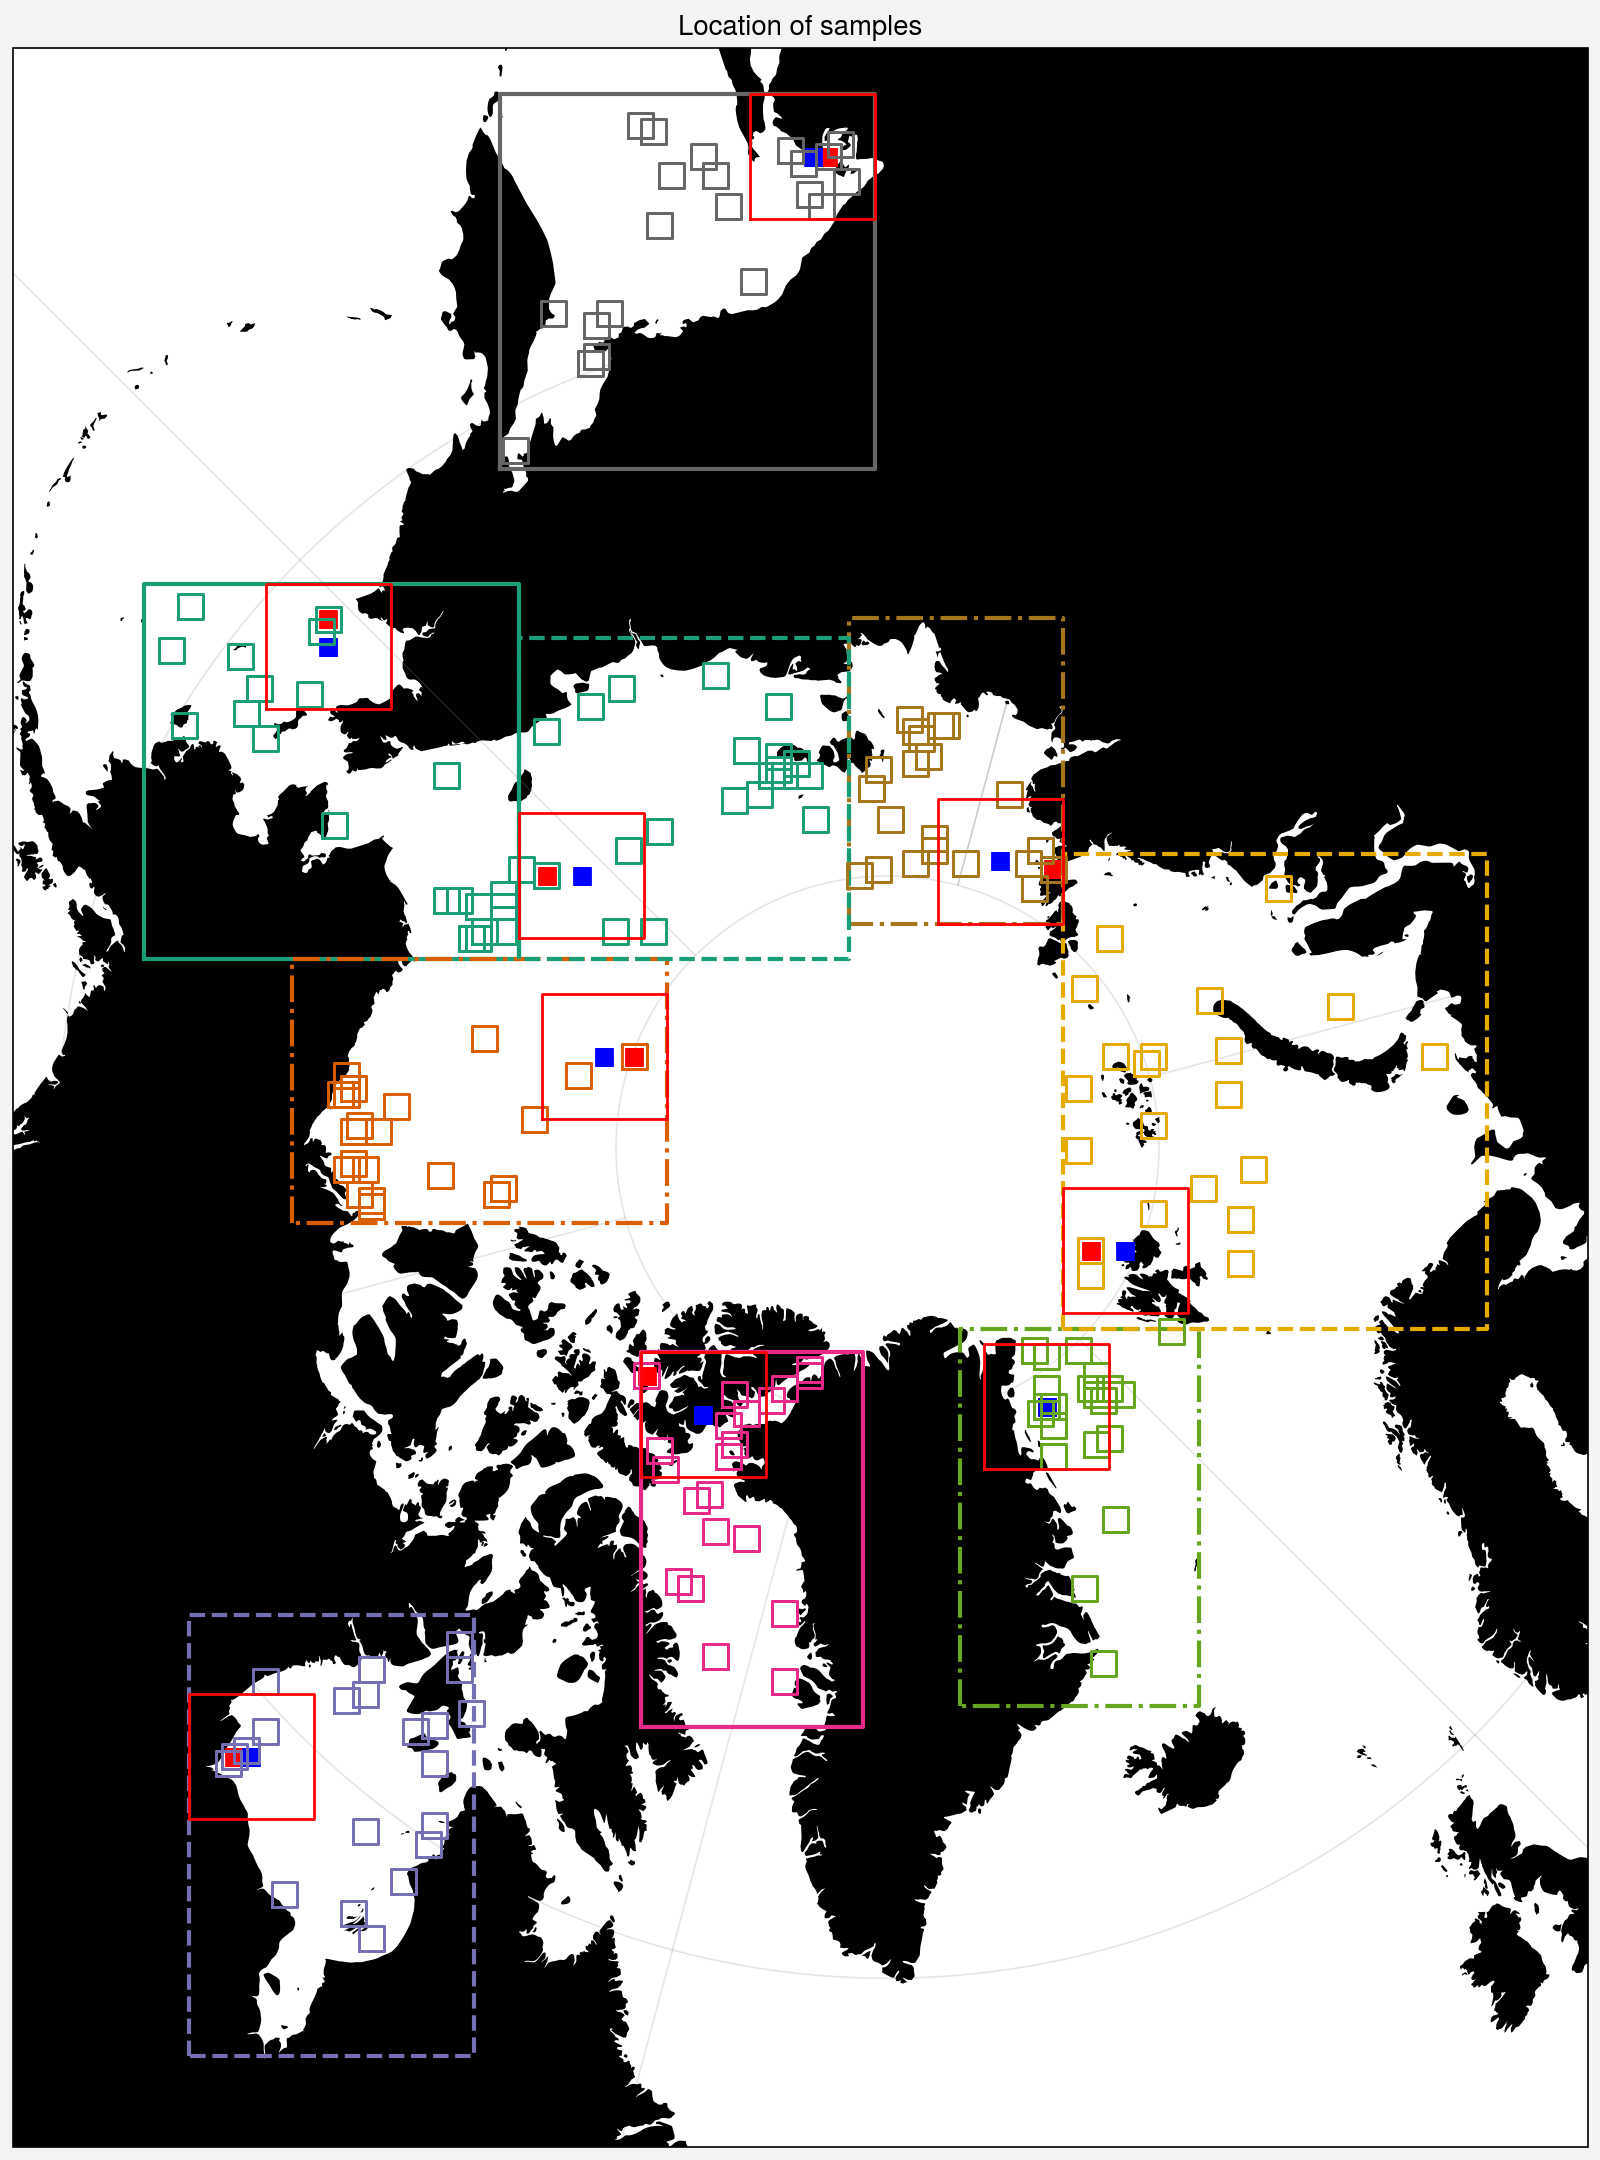

In [54]:
import ultraplot as pplt
import cartopy.crs as ccrs
import numpy as np

colors = {region: c['color'] for region, c in zip(
            regions.index,
            pplt.Cycle('dark2', len(regions)))}
linestyles = {region: ls for region, ls in zip(regions.index,
                        ['-', '-.', '--', '-', '-.', '--', '-.', '-', '--'])}

regions['print_title'] = [c.replace('_', ' ').title().replace('Of', 'of') for c in regions.index]
regions = regions.sort_values('center_lon')

for idx, row in regions.iterrows():
    if row.print_title == 'Barents Kara Seas':
        regions.loc[idx, 'print_title'] = 'Barents-Kara Seas'
    if row.print_title == 'Bering Chukchi Seas':
        regions.loc[idx, 'print_title'] = 'Bering-Chukchi Seas'

pplt.rc['geo.round'] = False
pplt.rc['reso'] = 'med'
crs = ccrs.NorthPolarStereo(central_longitude=-45, true_scale_latitude=70)
fig, ax = pplt.subplots(share=False, width=8,
    proj='npstere', proj_kw={'lon_0': -45})


ax.format(land=True, landzorder=0)

ice_floes_cases = df.loc[df.visible_floes == 'yes']
no_floes_cases = df.loc[df.visible_floes == 'no']

for idx, region, lat, lon in zip(range(len(regions)), regions.index, regions.center_lat, regions.center_lon):

    xbox = np.array(regions.loc[region, ['left_x', 'left_x', 'right_x', 'right_x', 'left_x']].astype(float))
    ybox = np.array(regions.loc[region, ['lower_y', 'upper_y', 'upper_y', 'lower_y', 'lower_y']].astype(float))
    
    ax.plot(xbox, ybox, transform=crs,
            label='({n}) {t}'.format(n=idx + 1, t=regions.loc[region, 'print_title']), 
               color=colors[region], ls=linestyles[region], m='', zorder=5, lw=1.5)
    
ax.set_extent([-3.5e6, 2.8e6, -4e6, 4.4e6], crs=crs)

for idx, case in df.iterrows():
    x0 = case.center_x
    y0 = case.center_y
    left = x0 - 50e3
    right = x0 + 50e3
    bottom = y0 - 50e3
    top = y0 + 50e3 
    region = case.region
    if str(case.case_number).zfill(3) in no_floes_cases.index:
        c = 'light gray'
        z = 1
        ax.plot(x0, y0, m='s', color=c, alpha=0.5, s=5, transform=crs, label='', zorder=0)
    else:
        c = colors[region]
        z = 20
    ax.plot([left, left, right, right, left],
        [bottom, top, top, bottom, bottom], label='',
            transform=crs, color=c, lw=1, zorder=z)

for idx, case in df_500km.iterrows():
    x0 = case.center_x
    y0 = case.center_y
    ax.plot(x0, y0, transform=crs, color='r', marker='s')
    ax.plot(case.new_center_lon, case.new_center_lat,transform=ccrs.PlateCarree(), color='b', marker='s')

    x0 = case.new_center_x
    y0 = case.new_center_y
    left = case.left_x
    right = case.right_x
    bottom = case.lower_y
    top = case.upper_y
    
    ax.plot([left, left, right, right, left],
        [bottom, top, top, bottom, bottom], label='',
            transform=crs, color='r', lw=1, zorder=z)

ax.format(title='Location of samples')



In [60]:
df_500km[['case_number', 'region', 'start_date',  'lower_left_lat', 'lower_left_lon','upper_right_lat', 'upper_right_lon', 'filename']]

,case_number,region,start_date,lower_left_lat,lower_left_lon,upper_right_lat,upper_right_lon,filename
0,1,baffin_bay,2022-09-11,74.881549,-81.829695,81.225423,-75.772385,001-baffin_bay-100km-20220911-terra-250m
42,22,barents_kara_seas,2006-09-09,81.114562,1.609915,78.847801,37.293291,022-barents_kara_seas-100km-20060909-aqua-250m
84,43,beaufort_sea,2019-08-13,77.233824,-139.647539,80.096784,-169.720727,043-beaufort_sea-100km-20190813-aqua-250m
128,65,bering_chukchi_seas,2008-05-07,62.430398,-170.175104,62.768830,176.415843,065-bering_chukchi_seas-100km-20080507-aqua-250m
171,86,east_siberian_sea,2006-09-27,74.457376,-164.635919,74.822274,171.010271,086-east_siberian_sea-100km-20060927-terra-250m
210,106,greenland_sea,2014-09-11,77.634370,-28.249735,79.078817,3.416588,106-greenland_sea-100km-20140911-aqua-250m
254,128,hudson_bay,2019-04-15,55.261626,-91.132939,61.316062,-91.385543,128-hudson_bay-100km-20190415-aqua-250m
294,148,laptev_sea,2011-03-24,81.538635,122.366873,75.653048,108.342036,148-laptev_sea-100km-20110324-aqua-250m
340,171,sea_of_okhostk,2009-06-18,56.320310,143.425308,52.459521,135.678541,171-sea_of_okhostk-100km-20090618-aqua-250m


In [46]:
500 / 1953

0.2560163850486431